In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
df = pd.read_csv('/content/lung cancer.csv')

In [3]:
df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUES,ALLERGYS,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [4]:
df.count()

,0
AGE,309
SMOKING,309
YELLOW_FINGERS,309
ANXIETY,309
PEER_PRESSURE,309
CHRONIC DISEASE,309
FATIGUES,309
ALLERGYS,309
WHEEZING,309
ALCOHOL CONSUMING,309


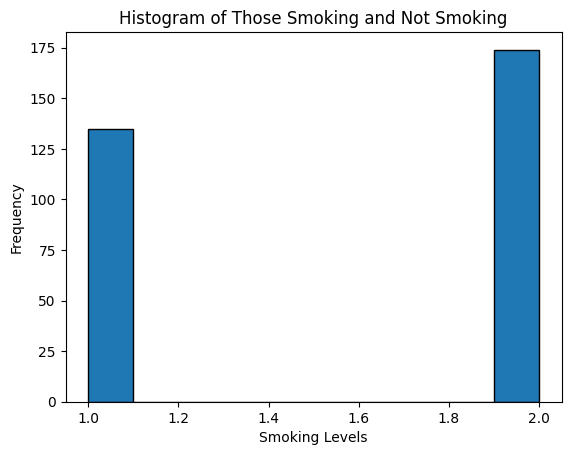

In [5]:
# Plot a histogram for the 'Glucose' variable
plt.hist(df['SMOKING'], bins=10, edgecolor='black')
plt.title('Histogram of Those Smoking and Not Smoking')
plt.xlabel('Smoking Levels')
plt.ylabel('Frequency')
plt.show()


In [7]:

import pandas as pd

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column containing categorical data

# Perform one-hot encoding
one_hot = pd.get_dummies(df[LUNG_CANCER])

# Remove the original column
df = df.drop(LUNG_CANCER, axis=1)

# Add the encoded columns to the DataFrame
df = df.join(one_hot)


NameError: name 'LUNG_CANCER' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the correlation matrix
dat = pd.read_csv('/content/lung cancer_heatmap.csv')
corr_matrix = dat.corr()

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:

# Count the number of individuals with and without lung cancer
lungcancer_counts = df['LUNG_CANCER'].value_counts()

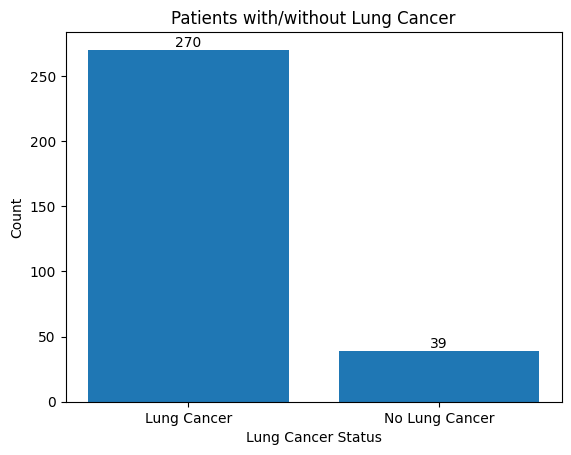

In [ ]:
# Create a bar chart
plt.bar(['Lung Cancer', 'No Lung Cancer'], lungcancer_counts)
plt.xlabel('Lung Cancer Status')
plt.ylabel('Count')
plt.title('Patients with/without Lung Cancer')
for i, count in enumerate(lungcancer_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.6 MB/s eta 0:00:00


In [ ]:
X = df[['AGE','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUES','ALLERGYS','WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN']]
y = df['LUNG_CANCER']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import column_or_1d

In [ ]:
y = column_or_1d(y, warn=True)

In [ ]:
print(df.columns)

Index(['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUES', 'ALLERGYS', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import HuberRegressor

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
accuracyLR = accuracy_score(y_test, predictions)
print("Accuracy:", accuracyLR)

Accuracy: 0.967741935483871


In [ ]:
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions, pos_label='YES')
recall = metrics.recall_score(y_test, predictions, pos_label='YES')

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.967741935483871
Precision: 0.9833333333333333
Recall: 0.9833333333333333


In [ ]:
from sklearn.metrics import classification_report

print("classification report:\n", classification_report(y_test,predictions))

classification report:
               precision    recall  f1-score   support

          NO       0.50      0.50      0.50         2
         YES       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [ ]:
for prediction in predictions:
    if prediction == 'YES':
        print("Predicted: Disease")
    else:
        print("Predicted: No Disease")


Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: No Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predicted: No Disease
Predicted: Disease
Predicted: Disease
Predicted: Disease
Predic

In [ ]:


# Create a DataFrame with column names
data = {'AGE': [70],
        'SMOKING': [1],
        'YELLOW_FINGERS': [1],
        'ANXIETY': [1],
        'ANXIETY': [1],
        'PEER_PRESSURE': [1],
        'CHRONIC DISEASE': [2],
        'FATIGUES': [2],
        'ALLERGYS': [2],
        'WHEEZING': [1],
        'ALCOHOL CONSUMING': [1],
        'COUGHING': [2],
        'SHORTNESS OF BREATH': [1],
        'SWALLOWING DIFFICULTY': [1],
        'CHEST PAIN': [1]}

df = pd.DataFrame(data)

# Use the DataFrame for prediction
prediction = model.predict(df)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
print(prediction)

['YES']


In [ ]:
model.predict([[70,1,1,1,1,1,2,2,2,1,1,2,1,1]])

array(['YES'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
predictions = model.predict(X)
conf_matrix = confusion_matrix(y, y_pred)

# Calculate specificity and sensitivity
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]

specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)

print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")

Specificity: 0.0
Sensitivity: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', eval_metric='Accuracy')


In [ ]:
# Fit the model on the training data
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=100)

0:	learn: 0.9109312	test: 0.8870968	best: 0.8870968 (0)	total: 47.8ms	remaining: 47.8s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9677419355
bestIteration = 7

Shrink model to first 8 iterations.


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [ ]:
# Calculate the accuracy of the model
accuracyCB = accuracy_score(y_test, y_pred)
print(f"Accuracy of the CatBoost model: {accuracyCB}")

Accuracy of the CatBoost model: 0.967741935483871


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
predictionKNN = knn.predict(X_test)

In [ ]:
accuracyKNN = accuracy_score(y_test, predictionKNN)
print("Accuracy:", accuracyKNN)

Accuracy: 0.9354838709677419


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
predictionNB = nb.predict(X_test)

In [ ]:
accuracyNB = accuracy_score(y_test, predictionNB)
print("Accuracy:", accuracyNB)

Accuracy: 0.9516129032258065


In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracySVM = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracySVM)

Accuracy: 0.967741935483871


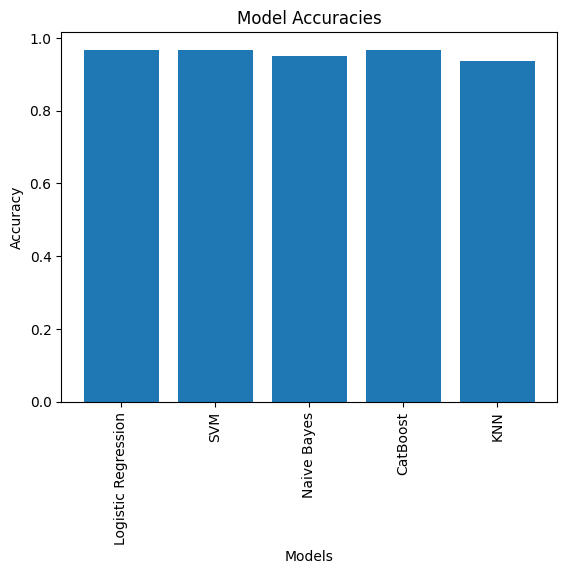

In [ ]:
import matplotlib.pyplot as plt



accuracies = (accuracyLR, accuracySVM, accuracyNB, accuracyCB,  accuracyKNN)
models = ('Logistic Regression', 'SVM', 'Naive Bayes', 'CatBoost','KNN')

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the time taken to build each model in seconds
time_taken = (timeLR, timeSVM, timeNB, timeCB, timeKNN)

models = ('Logistic Regression', 'SVM', 'Naive Bayes', 'CatBoost','KNN')

# Create a bar chart
plt.bar(models, time_taken, color ='maroon', width = 0.4)

plt.xlabel("Models")
plt.ylabel("Time taken (in seconds)")
plt.title("Time taken to build models")
plt.show()


NameError: name 'timeLR' is not defined